<a href="https://colab.research.google.com/github/oceanblue05/leaf-disease-detection-pretrained-model-/blob/main/leaf_detection_disease(pretrained_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file

Saving title1-Labeled_Dataset.csv to title1-Labeled_Dataset.csv


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Define CNN Model
def build_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example Usage
input_shape = (128, 128, 3)  # Modify based on your dataset
num_classes = 5  # Modify based on the number of disease categories
cnn_model = build_cnn_model(input_shape, num_classes)

# Summary of the Model
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd

df = pd.read_csv("title1-Labeled_Dataset.csv")
print(df.head())  # Show first 5 rows


  image_id    label
0   Test_0     rust
1   Test_1     scab
2   Test_2  healthy
3   Test_3     rust
4   Test_4     rust


In [ ]:
print(df["image_id"].head())  # Show sample image filenames


0    Test_0
1    Test_1
2    Test_2
3    Test_3
4    Test_4
Name: image_id, dtype: object


In [ ]:
print(df["image_id"].head())  # Show sample image filenames


0    Test_0
1    Test_1
2    Test_2
3    Test_3
4    Test_4
Name: image_id, dtype: object


In [ ]:
image_dir = "/path_to_images/"  # Update this with the actual folder where images are stored
df["image_path"] = df["image_id"].apply(lambda x: os.path.join(image_dir, x))

print(df["image_path"].head())  # Show generated image paths


0    /path_to_images/Test_0
1    /path_to_images/Test_1
2    /path_to_images/Test_2
3    /path_to_images/Test_3
4    /path_to_images/Test_4
Name: image_path, dtype: object


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load dataset
df = pd.read_csv("title1-Labeled_Dataset.csv")

# Debugging: Check if dataset is loaded correctly
print("Dataset Loaded Successfully. First 5 Rows:")
print(df.head())  # Display first 5 rows to check structure

# Define the correct image directory (UPDATE THIS!)
image_dir = "/content/path_to_images/"  # Change this to the actual path where images are stored

# Ensure image_id column exists and generate full image paths
if "image_id" in df.columns:
    df["image_path"] = df["image_id"].apply(lambda x: os.path.join(image_dir, str(x)))
else:
    raise KeyError("Column 'image_id' not found in the dataset!")

# Debugging: Check if paths are generated correctly
print("\nGenerated Image Paths:")
print(df["image_path"].head())

# Convert labels to categorical
if "label" in df.columns:
    df["label"] = df["label"].astype(str)  # Ensure labels are in string format
    num_classes = df["label"].nunique()
else:
    raise KeyError("Column 'label' not found in the dataset!")

# Debugging: Display unique class count
print(f"\nTotal Number of Classes: {num_classes}")
print("Unique Labels:", df["label"].unique())


Dataset Loaded Successfully. First 5 Rows:
  image_id    label
0   Test_0     rust
1   Test_1     scab
2   Test_2  healthy
3   Test_3     rust
4   Test_4     rust

Generated Image Paths:
0    /content/path_to_images/Test_0
1    /content/path_to_images/Test_1
2    /content/path_to_images/Test_2
3    /content/path_to_images/Test_3
4    /content/path_to_images/Test_4
Name: image_path, dtype: object

Total Number of Classes: 4
Unique Labels: ['rust' 'scab' 'healthy' 'multiple_diseases']


In [ ]:
import pandas as pd

df = pd.read_csv("title1-Labeled_Dataset.csv")
print(df.columns)  # This will print all column names


Index(['image_id', 'label'], dtype='object')


In [ ]:
# Assuming images are stored as .jpg (change to .png if needed)
df["image_path"] = df["image_path"] + ".jpg"

# Verify updated paths
print(df["image_path"].head())


0    /content/path_to_images/Test_0.jpg
1    /content/path_to_images/Test_1.jpg
2    /content/path_to_images/Test_2.jpg
3    /content/path_to_images/Test_3.jpg
4    /content/path_to_images/Test_4.jpg
Name: image_path, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

print(f"Training Samples: {len(train_df)} | Testing Samples: {len(test_df)}")


Training Samples: 1456 | Testing Samples: 365


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalization + 20% Validation Set

train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col="image_path", y_col="label", target_size=(128, 128),
    batch_size=32, class_mode="categorical", subset="training"
)

val_generator = train_datagen.flow_from_dataframe(
    train_df, x_col="image_path", y_col="label", target_size=(128, 128),
    batch_size=32, class_mode="categorical", subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df, x_col="image_path", y_col="label", target_size=(128, 128),
    batch_size=32, class_mode="categorical", shuffle=False
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1456 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1456 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 365 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Load the pre-trained EfficientNetB0 model
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
dataset/
  ├── train/
  │     ├── rust/
  │     ├── scab/
  │     ├── healthy/
  │     ├── multiple_diseases/
  ├── validation/
  │     ├── rust/
  │     ├── scab/
  │     ├── healthy/
  │     ├── multiple_diseases/


SyntaxError: invalid character '├' (U+251C) (<ipython-input-23-4cc8c12eb630>, line 2)

In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFilter
import random
import os

# Define image size
IMAGE_SIZE = (128, 128)

# Define disease categories
CATEGORIES = ["rust", "scab", "healthy", "multiple_diseases"]

# Define output directory
OUTPUT_DIR = "leaf_disease_dataset"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Function to generate a synthetic leaf
def generate_leaf(base_color, disease_type):
    # Create a blank image
    leaf = Image.new("RGB", IMAGE_SIZE, (255, 255, 255))
    draw = ImageDraw.Draw(leaf)

    # Draw a leaf shape (ellipse)
    draw.ellipse((10, 10, IMAGE_SIZE[0] - 10, IMAGE_SIZE[1] - 10), fill=base_color, outline="darkgreen")

    # Add disease-specific textures
    if disease_type == "rust":
        # Add rust-like spots
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
    elif disease_type == "scab":
        # Add scab-like patches
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")
    elif disease_type == "multiple_diseases":
        # Combine rust and scab
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")

    # Add noise for realism
    leaf = np.array(leaf)
    noise = np.random.normal(0, 10, leaf.shape).astype(np.uint8)
    leaf = cv2.add(leaf, noise)

    # Apply blur for realism
    leaf = cv2.GaussianBlur(leaf, (5, 5), 0)

    return Image.fromarray(leaf)

# Function to generate a dataset
def generate_dataset(num_images_per_category):
    for category in CATEGORIES:
        category_dir = os.path.join(OUTPUT_DIR, category)
        os.makedirs(category_dir, exist_ok=True)

        for i in range(num_images_per_category):
            # Randomize base color (green with variations)
            base_color = (random.randint(50, 150), random.randint(100, 200), random.randint(50, 150))

            # Generate leaf image
            leaf_image = generate_leaf(base_color, category)

            # Save image
            image_path = os.path.join(category_dir, f"{category}_{i}.png")
            leaf_image.save(image_path)

    print(f"Dataset generated at {OUTPUT_DIR}")

# Generate 100 images per category
generate_dataset(100)

Dataset generated at leaf_disease_dataset


In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFilter
import random

# Define image size
IMAGE_SIZE = (128, 128)

def generate_leaf(base_color, disease_type):
    # Create a blank RGBA image (transparent background)
    leaf = Image.new("RGBA", IMAGE_SIZE, (255, 255, 255, 0))
    draw = ImageDraw.Draw(leaf)

    # Draw a leaf shape (ellipse)
    draw.ellipse((10, 10, IMAGE_SIZE[0] - 10, IMAGE_SIZE[1] - 10), fill=base_color, outline="darkgreen")

    # Add disease-specific textures
    if disease_type == "rust":
        # Add rust-like spots
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
    elif disease_type == "scab":
        # Add scab-like patches
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")
    elif disease_type == "multiple_diseases":
        # Combine rust and scab
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")

    # Convert PIL image to numpy array (RGBA)
    leaf_np = np.array(leaf)

    # Extract the RGB channels and alpha channel
    rgb = leaf_np[:, :, :3]
    alpha = leaf_np[:, :, 3]

    # Add noise only to the RGB channels
    noise = np.random.normal(0, 10, rgb.shape).astype(np.uint8)
    rgb = cv2.add(rgb, noise)

    # Apply blur to the RGB channels
    rgb = cv2.GaussianBlur(rgb, (5, 5), 0)

    # Combine the RGB channels with the original alpha channel
    leaf_np = np.dstack((rgb, alpha))

    # Convert back to PIL image
    leaf = Image.fromarray(leaf_np, "RGBA")

    # Rotate the leaf
    angle = random.randint(-45, 45)
    leaf = leaf.rotate(angle, expand=True, resample=Image.BILINEAR)

    # Resize back to 128x128 using LANCZOS resampling
    leaf = leaf.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)

    # Add background
    background = Image.new("RGB", IMAGE_SIZE, random.choice(["lightgreen", "brown", "white"]))
    background.paste(leaf, mask=leaf.split()[3])  # Paste leaf with transparency

    return background

# Example usage
leaf_image = generate_leaf((50, 150, 50), "rust")
leaf_image.show()  # Display the generated image
leaf_image.save("output_leaf.png")  # Save the generated image
print("Image generated and saved as 'output_leaf.png'")

Image generated and saved as 'output_leaf.png'


In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageEnhance, ImageOps
import random
import os

# Define image size
IMAGE_SIZE = (128, 128)

# Define output directory
OUTPUT_DIR = "augmented_leaf_dataset"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Function to generate a synthetic leaf
def generate_leaf(base_color, disease_type):
    # Create a blank RGBA image (transparent background)
    leaf = Image.new("RGBA", IMAGE_SIZE, (255, 255, 255, 0))
    draw = ImageDraw.Draw(leaf)

    # Draw a leaf shape (ellipse)
    draw.ellipse((10, 10, IMAGE_SIZE[0] - 10, IMAGE_SIZE[1] - 10), fill=base_color, outline="darkgreen")

    # Add disease-specific textures
    if disease_type == "rust":
        # Add rust-like spots
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
    elif disease_type == "scab":
        # Add scab-like patches
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")
    elif disease_type == "multiple_diseases":
        # Combine rust and scab
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")

    # Convert PIL image to numpy array (RGBA)
    leaf_np = np.array(leaf)

    # Extract the RGB channels and alpha channel
    rgb = leaf_np[:, :, :3]
    alpha = leaf_np[:, :, 3]

    # Add noise only to the RGB channels
    noise = np.random.normal(0, 10, rgb.shape).astype(np.uint8)
    rgb = cv2.add(rgb, noise)

    # Apply blur to the RGB channels
    rgb = cv2.GaussianBlur(rgb, (5, 5), 0)

    # Combine the RGB channels with the original alpha channel
    leaf_np = np.dstack((rgb, alpha))

    # Convert back to PIL image
    leaf = Image.fromarray(leaf_np, "RGBA")

    # Rotate the leaf
    angle = random.randint(-45, 45)
    leaf = leaf.rotate(angle, expand=True, resample=Image.BILINEAR)

    # Resize back to 128x128 using LANCZOS resampling
    leaf = leaf.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)

    # Add background
    background = Image.new("RGB", IMAGE_SIZE, random.choice(["lightgreen", "brown", "white"]))
    background.paste(leaf, mask=leaf.split()[3])  # Paste leaf with transparency

    return background

# Function to apply advanced augmentations
def augment_image(image):
    # Random rotation
    angle = random.randint(-180, 180)
    image = image.rotate(angle, resample=Image.BILINEAR)

    # Random flipping
    if random.random() > 0.5:
        image = ImageOps.mirror(image)
    if random.random() > 0.5:
        image = ImageOps.flip(image)

    # Random zoom
    zoom_factor = random.uniform(0.8, 1.2)
    new_size = (int(IMAGE_SIZE[0] * zoom_factor), int(IMAGE_SIZE[1] * zoom_factor))
    image = image.resize(new_size, Image.Resampling.LANCZOS)
    image = image.crop((0, 0, IMAGE_SIZE[0], IMAGE_SIZE[1]))  # Crop back to original size

    # Random color jittering
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Adjust saturation
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Adjust brightness
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Adjust contrast

    return image

# Generate and save 5 augmented images for each category
categories = ["rust", "scab", "healthy", "multiple_diseases"]
num_images_per_category = 5

for category in categories:
    category_dir = os.path.join(OUTPUT_DIR, category)
    os.makedirs(category_dir, exist_ok=True)

    for i in range(num_images_per_category):
        # Randomize base color (green with variations)
        base_color = (random.randint(50, 150), random.randint(100, 200), random.randint(50, 150))

        # Generate leaf image
        leaf_image = generate_leaf(base_color, category)

        # Apply augmentations
        augmented_image = augment_image(leaf_image)

        # Save image
        image_path = os.path.join(category_dir, f"{category}_{i}.png")
        augmented_image.save(image_path)

print(f"Augmented dataset generated at {OUTPUT_DIR}")

Augmented dataset generated at augmented_leaf_dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load dataset
train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Build and train a CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(categories), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_generator, validation_data=validation_generator, epochs=10)

Found 16 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 1.4927 - val_accuracy: 0.2500 - val_loss: 14.0306
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step - accuracy: 0.2500 - loss: 12.3271 - val_accuracy: 0.2500 - val_loss: 20.3086
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.2500 - loss: 16.2278 - val_accuracy: 0.2500 - val_loss: 9.6574
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - accuracy: 0.4375 - loss: 7.4737 - val_accuracy: 0.2500 - val_loss: 5.2235
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - accuracy: 0.4375 - loss: 3.7032 - val_accuracy: 0.2500 - val_loss: 9.3366
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.2500 - loss: 7.0680 - val_accuracy: 0.2500 - val_loss: 8.8769
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 0.2500 - loss: 6.4098 - val_accuracy: 0.2500 - val_loss: 5.8169
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 0.3750 - loss: 3.5428 - val_accuracy: 0.5000 - val_loss: 2.7186
Ep

In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageEnhance, ImageOps
import random
import os

# Define image size
IMAGE_SIZE = (128, 128)

# Define output directory
OUTPUT_DIR = "augmented_leaf_dataset"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Function to generate a synthetic leaf
def generate_leaf(base_color, disease_type):
    # Create a blank RGBA image (transparent background)
    leaf = Image.new("RGBA", IMAGE_SIZE, (255, 255, 255, 0))
    draw = ImageDraw.Draw(leaf)

    # Draw a leaf shape (ellipse)
    draw.ellipse((10, 10, IMAGE_SIZE[0] - 10, IMAGE_SIZE[1] - 10), fill=base_color, outline="darkgreen")

    # Add disease-specific textures
    if disease_type == "rust":
        # Add rust-like spots
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
    elif disease_type == "scab":
        # Add scab-like patches
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")
    elif disease_type == "multiple_diseases":
        # Combine rust and scab
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")

    # Convert PIL image to numpy array (RGBA)
    leaf_np = np.array(leaf)

    # Extract the RGB channels and alpha channel
    rgb = leaf_np[:, :, :3]
    alpha = leaf_np[:, :, 3]

    # Add noise only to the RGB channels
    noise = np.random.normal(0, 10, rgb.shape).astype(np.uint8)
    rgb = cv2.add(rgb, noise)

    # Apply blur to the RGB channels
    rgb = cv2.GaussianBlur(rgb, (5, 5), 0)

    # Combine the RGB channels with the original alpha channel
    leaf_np = np.dstack((rgb, alpha))

    # Convert back to PIL image
    leaf = Image.fromarray(leaf_np, "RGBA")

    # Rotate the leaf
    angle = random.randint(-45, 45)
    leaf = leaf.rotate(angle, expand=True, resample=Image.BILINEAR)

    # Resize back to 128x128 using LANCZOS resampling
    leaf = leaf.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)

    # Add background
    background = Image.new("RGB", IMAGE_SIZE, random.choice(["lightgreen", "brown", "white"]))
    background.paste(leaf, mask=leaf.split()[3])  # Paste leaf with transparency

    return background

# Function to apply advanced augmentations
def augment_image(image):
    # Random rotation
    angle = random.randint(-180, 180)
    image = image.rotate(angle, resample=Image.BILINEAR)

    # Random flipping
    if random.random() > 0.5:
        image = ImageOps.mirror(image)
    if random.random() > 0.5:
        image = ImageOps.flip(image)

    # Random zoom
    zoom_factor = random.uniform(0.8, 1.2)
    new_size = (int(IMAGE_SIZE[0] * zoom_factor), int(IMAGE_SIZE[1] * zoom_factor))
    image = image.resize(new_size, Image.Resampling.LANCZOS)
    image = image.crop((0, 0, IMAGE_SIZE[0], IMAGE_SIZE[1]))  # Crop back to original size

    # Random color jittering
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Adjust saturation
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Adjust brightness
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))  # Adjust contrast

    return image

# Generate and save 100 augmented images for each category
categories = ["rust", "scab", "healthy", "multiple_diseases"]
num_images_per_category = 100  # Increased from 5 to 100

for category in categories:
    category_dir = os.path.join(OUTPUT_DIR, category)
    os.makedirs(category_dir, exist_ok=True)

    for i in range(num_images_per_category):
        # Randomize base color (green with variations)
        base_color = (random.randint(50, 150), random.randint(100, 200), random.randint(50, 150))

        # Generate leaf image
        leaf_image = generate_leaf(base_color, category)

        # Apply augmentations
        augmented_image = augment_image(leaf_image)

        # Save image
        image_path = os.path.join(category_dir, f"{category}_{i}.png")
        augmented_image.save(image_path)

print(f"Augmented dataset generated at {OUTPUT_DIR}")

Augmented dataset generated at augmented_leaf_dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and categories
IMAGE_SIZE = (128, 128)
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Define the model
model = tf.keras.Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

# Define data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load dataset
train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to the dataset
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to the dataset
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Number of epochs
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.0001)]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2530 - loss: 1.5727 - val_accuracy: 0.2500 - val_loss: 1.3921 - learning_rate: 0.0010
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2280 - loss: 1.3905 - val_accuracy: 0.2750 - val_loss: 1.3896 - learning_rate: 0.0010
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.2279 - loss: 1.3812 - val_accuracy: 0.2500 - val_loss: 1.3958 - learning_rate: 0.0010
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3038 - loss: 1.3615 - val_accuracy: 0.2625 - val_loss: 1.4101 - learning_rate: 0.0010
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3095 - loss: 1.3601 - val_accuracy: 0.2875 - val_loss: 1.4103 - learning_rate: 2.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3325 - loss: 1.3462 - val_accuracy: 0.2750 - val_loss: 1.4239 - learning_rate: 2.0000e-04
Epoch 7/10


In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Define the model
model = tf.keras.Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.7),  # Increase dropout rate
    tf.keras.layers.Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,116 (14.14 MB)

 Trainable params: 3,706,116 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Train for 50 epochs
    batch_size=16,  # Use a smaller batch size
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.0001)]
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 896ms/step - accuracy: 0.2630 - loss: 3.1656 - val_accuracy: 0.2375 - val_loss: 2.2913 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 980ms/step - accuracy: 0.2537 - loss: 2.2598 - val_accuracy: 0.2000 - val_loss: 2.1309 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 989ms/step - accuracy: 0.2974 - loss: 2.0759 - val_accuracy: 0.2500 - val_loss: 1.9517 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2958 - loss: 1.9135 - val_accuracy: 0.2750 - val_loss: 1.8518 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3499 - loss: 1.8015 - val_accuracy: 0.2125 - val_loss: 1.7881 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 986ms/step - accuracy: 0.3358 - loss: 1.7536 - val_accuracy: 0.2125 - val_loss: 1.7449 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3408 - loss: 1.6919 - va

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.2344 - loss: 1.8504
Validation Loss: 1.8474925756454468
Validation Accuracy: 0.25


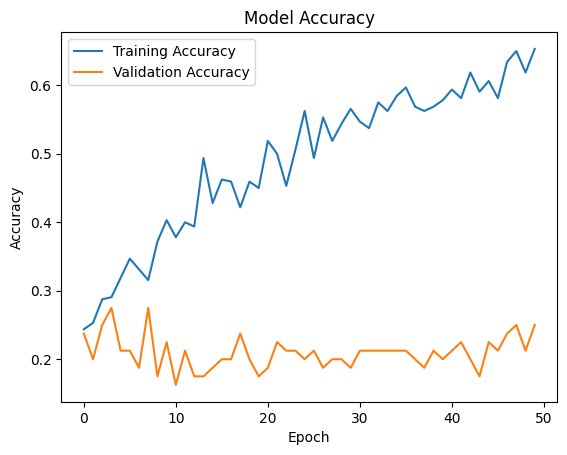

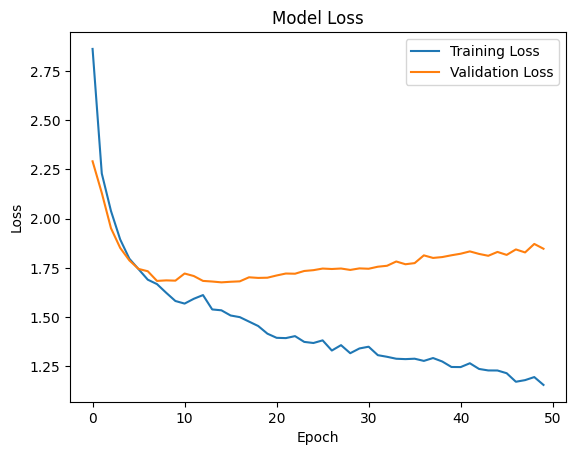

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.2607 - loss: 1.7531 - val_accuracy: 0.2500 - val_loss: 1.5026 - learning_rate: 1.0000e-04
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.2444 - loss: 1.5945 - val_accuracy: 0.2500 - val_loss: 1.4273 - learning_rate: 1.0000e-04
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2582 - loss: 1.5187 - val_accuracy: 0.2500 - val_loss: 1.3953 - learning_rate: 1.0000e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2705 - loss: 1.5284 - val_accuracy: 0.2000 - val_loss: 1.3856 - learning_rate: 1.0000e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2432 - loss: 1.4896 - val_accuracy: 0.2875 - val_loss: 1.3828 - learning_rate: 1.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3060 - loss: 1.4746 - val_accuracy: 0.2750 - val_loss: 1.3821 - learning_rate: 1.0000

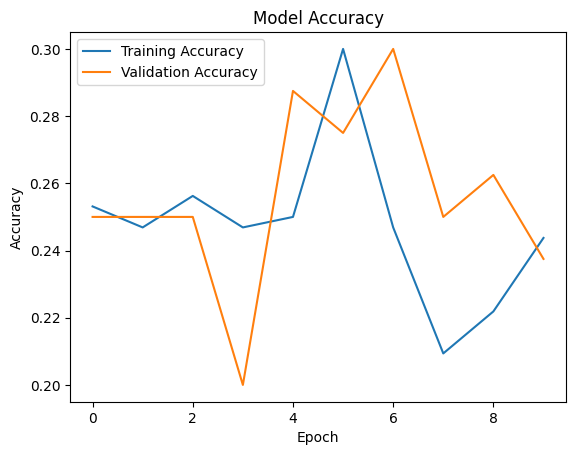

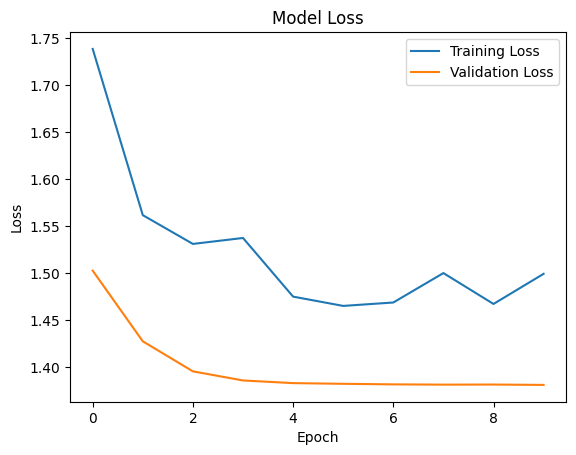

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define image size and categories
IMAGE_SIZE = (128, 128)
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Step 1: Load Pre-trained ResNet50 Model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Step 2: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(len(categories), activation="softmax")(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Use a small learning rate
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()

# Step 4: Prepare Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to the dataset
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to the dataset
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Step 5: Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Train for 10 epochs
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.00001)]
)

# Step 6: Evaluate the Model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Step 7: Plot Training Results
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and categories
IMAGE_SIZE = (128, 128)
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model (so its weights are not updated during training)
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = Dense(128, activation="relu")(x)  # Fully connected layer
predictions = Dense(len(categories), activation="softmax")(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Define data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load dataset
train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Train for 10 epochs
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.2682 - loss: 1.4450 - val_accuracy: 0.2500 - val_loss: 1.4242
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2521 - loss: 1.4153 - val_accuracy: 0.2125 - val_loss: 1.4021
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.2683 - loss: 1.3933 - val_accuracy: 0.2250 - val_loss: 1.3930
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2619 - loss: 1.3849 - val_accuracy: 0.2125 - val_loss: 1.3900
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.2847 - loss: 1.3819 - val_accuracy: 0.2875 - val_loss: 1.3889
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3017 - loss: 1.3823 - val_accuracy: 0.2625 - val_loss: 1.3886
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2896 - loss: 1.3813 - val_accuracy: 0.2000 - val_loss: 1.3879
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2658 - loss: 1.3804 - val_accuracy: 0.2125 - val_loss:

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1805 - loss: 1.3904
Validation Loss: 1.3873398303985596
Validation Accuracy: 0.21250000596046448


In [ ]:
# Save the model
model.save("resnet_leaf_disease_model.h5")

In [ ]:
model.save("resnet_leaf_disease_model.keras")

In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'title1-Labeled_Dataset.csv', 'output_leaf.png', 'leaf_disease_dataset', 'augmented_leaf_dataset', 'resnet_leaf_disease_model.keras', 'resnet_leaf_disease_model.h5', 'sample_data']


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("resnet_leaf_disease_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess a new image
img_path = "path_to_new_image.png"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (same as during training)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the predicted class index
print(f"Predicted Class: {categories[predicted_class[0]]}")

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_new_image.png'

In [ ]:
img_path = "leaf_image.png"  # Replace with the actual file name

In [ ]:
img_path = "/home/user/images/leaf_image.png"  # Replace with the actual path

In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'title1-Labeled_Dataset.csv', 'output_leaf.png', 'leaf_disease_dataset', 'augmented_leaf_dataset', 'resnet_leaf_disease_model.keras', 'resnet_leaf_disease_model.h5', 'sample_data']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess a new image
img_path = "leaf_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (same as during training)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the predicted class index
print(f"Predicted Class: {categories[predicted_class[0]]}")

FileNotFoundError: [Errno 2] No such file or directory: 'leaf_image.png'

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
img_path = "/home/user/images/leaf_image.png"  # Replace with the actual path

In [ ]:
from PIL import Image, ImageDraw

# Generate a synthetic leaf image
leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
draw = ImageDraw.Draw(leaf)
draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape
leaf.save("leaf_image.png")  # Save the image

print("Synthetic leaf image saved as 'leaf_image.png'")

Synthetic leaf image saved as 'leaf_image.png'


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess a new image
img_path = "leaf_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (same as during training)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the predicted class index
print(f"Predicted Class: {categories[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: scab


In [ ]:
# Test with another image
img_path = "rust_image.png"  # Replace with the path to a rust image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

FileNotFoundError: [Errno 2] No such file or directory: 'rust_image.png'

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
img_path = "/home/user/images/rust_image.png"  # Replace with the actual path

In [ ]:
from PIL import Image, ImageDraw

# Generate a synthetic rust-infected leaf image
leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
draw = ImageDraw.Draw(leaf)
draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape

# Add rust-like spots
for _ in range(30):  # Add 30 rust spots
    x = random.randint(0, 128)
    y = random.randint(0, 128)
    draw.ellipse((x, y, x + 5, y + 5), fill="brown")  # Rust spots

leaf.save("rust_image.png")  # Save the image
print("Synthetic rust-infected leaf image saved as 'rust_image.png'")

Synthetic rust-infected leaf image saved as 'rust_image.png'


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess a new image
img_path = "rust_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (same as during training)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the predicted class index
print(f"Predicted Class: {categories[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: scab


In [ ]:
from PIL import Image

# Load and display the image
img_path = "rust_image.png"  # Replace with the actual path to your image
img = Image.open(img_path)
img.show()  # Display the image

In [ ]:
from PIL import Image, ImageDraw
import random

# Generate a synthetic rust-infected leaf image
def generate_rust_image(output_path):
    leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
    draw = ImageDraw.Draw(leaf)
    draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape

    # Add rust-like spots
    for _ in range(30):  # Add 30 rust spots
        x = random.randint(0, 128)
        y = random.randint(0, 128)
        draw.ellipse((x, y, x + 5, y + 5), fill="brown")  # Rust spots

    leaf.save(output_path)  # Save the image
    print(f"Synthetic rust-infected leaf image saved as {output_path}")

# Generate multiple rust images
for i in range(10):  # Generate 10 rust images
    generate_rust_image(f"rust_image_{i}.png")

Synthetic rust-infected leaf image saved as rust_image_0.png
Synthetic rust-infected leaf image saved as rust_image_1.png
Synthetic rust-infected leaf image saved as rust_image_2.png
Synthetic rust-infected leaf image saved as rust_image_3.png
Synthetic rust-infected leaf image saved as rust_image_4.png
Synthetic rust-infected leaf image saved as rust_image_5.png
Synthetic rust-infected leaf image saved as rust_image_6.png
Synthetic rust-infected leaf image saved as rust_image_7.png
Synthetic rust-infected leaf image saved as rust_image_8.png
Synthetic rust-infected leaf image saved as rust_image_9.png


In [ ]:
from PIL import Image, ImageDraw
import random
import os

# Define image size
IMAGE_SIZE = (128, 128)

# Function to generate a synthetic leaf
def generate_leaf(base_color, disease_type, output_path):
    # Create a blank RGBA image (transparent background)
    leaf = Image.new("RGBA", IMAGE_SIZE, (255, 255, 255, 0))
    draw = ImageDraw.Draw(leaf)

    # Draw a leaf shape (ellipse)
    draw.ellipse((10, 10, IMAGE_SIZE[0] - 10, IMAGE_SIZE[1] - 10), fill=base_color, outline="darkgreen")

    # Add disease-specific textures
    if disease_type == "rust":
        # Add rust-like spots
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
    elif disease_type == "scab":
        # Add scab-like patches
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")
    elif disease_type == "multiple_diseases":
        # Combine rust and scab
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, IMAGE_SIZE[0])
            y = random.randint(0, IMAGE_SIZE[1])
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")

    # Convert PIL image to numpy array (RGBA)
    leaf_np = np.array(leaf)

    # Extract the RGB channels and alpha channel
    rgb = leaf_np[:, :, :3]
    alpha = leaf_np[:, :, 3]

    # Add noise only to the RGB channels
    noise = np.random.normal(0, 10, rgb.shape).astype(np.uint8)
    rgb = cv2.add(rgb, noise)

    # Apply blur to the RGB channels
    rgb = cv2.GaussianBlur(rgb, (5, 5), 0)

    # Combine the RGB channels with the original alpha channel
    leaf_np = np.dstack((rgb, alpha))

    # Convert back to PIL image
    leaf = Image.fromarray(leaf_np, "RGBA")

    # Rotate the leaf
    angle = random.randint(-45, 45)
    leaf = leaf.rotate(angle, expand=True, resample=Image.BILINEAR)

    # Resize back to 128x128 using LANCZOS resampling
    leaf = leaf.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)

    # Add background
    background = Image.new("RGB", IMAGE_SIZE, random.choice(["lightgreen", "brown", "white"]))
    background.paste(leaf, mask=leaf.split()[3])  # Paste leaf with transparency

    # Save the image
    background.save(output_path)

# Generate synthetic images for each category
categories = ["rust", "scab", "healthy", "multiple_diseases"]
num_images_per_category = 100  # Generate 100 images per category

for category in categories:
    category_dir = os.path.join("augmented_leaf_dataset", category)
    os.makedirs(category_dir, exist_ok=True)

    for i in range(num_images_per_category):
        # Randomize base color (green with variations)
        base_color = (random.randint(50, 150), random.randint(100, 200), random.randint(50, 150))

        # Generate leaf image
        output_path = os.path.join(category_dir, f"{category}_{i}.png")
        generate_leaf(base_color, category, output_path)

print(f"Generated {num_images_per_category} images for each category in 'augmented_leaf_dataset'.")

Generated 100 images for each category in 'augmented_leaf_dataset'.


In [ ]:
import os

# Define dataset path
dataset_path = "augmented_leaf_dataset"

# Count images in each category
for category in categories:
    category_dir = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_dir))
    print(f"{category}: {num_images} images")

rust: 100 images
scab: 100 images
healthy: 100 images
multiple_diseases: 100 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load dataset
train_generator = datagen.flow_from_directory(
    dataset_path,  # Path to the balanced dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    dataset_path,  # Path to the balanced dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model initially
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = Dense(128, activation="relu")(x)  # Fully connected layer
predictions = Dense(len(categories), activation="softmax")(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model initially
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Train for 10 epochs
)

# Unfreeze the last 20 layers of ResNet50
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Continue training (fine-tuning)
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Train for an additional 10 epochs
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.000001)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.2184 - loss: 1.5338 - val_accuracy: 0.2500 - val_loss: 1.4392
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2599 - loss: 1.4163 - val_accuracy: 0.2500 - val_loss: 1.4032
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2643 - loss: 1.3818 - val_accuracy: 0.2500 - val_loss: 1.3916
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2441 - loss: 1.3887 - val_accuracy: 0.2500 - val_loss: 1.3880
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2539 - loss: 1.3904 - val_accuracy: 0.2500 - val_loss: 1.3871
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2229 - loss: 1.3912 - val_accuracy: 0.2250 - val_loss: 1.3877
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2374 - loss: 1.3885 - val_accuracy: 0.2500 - val_loss: 1.3888
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2233 - loss: 1.3887 - val_accuracy: 0.2375 - val_loss:

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2383 - loss: 1.4908
Validation Loss: 1.4787099361419678
Validation Accuracy: 0.25


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Test with another rust image
img_path = "another_rust_image.png"  # Replace with the path to another rust image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

FileNotFoundError: [Errno 2] No such file or directory: 'another_rust_image.png'

In [ ]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory
print("Files in Current Directory:", os.listdir())

Current Working Directory: /content
Files in Current Directory: ['.config', 'title1-Labeled_Dataset.csv', 'rust_image_4.png', 'rust_image_7.png', 'output_leaf.png', 'leaf_disease_dataset', 'rust_image_9.png', 'rust_image_5.png', 'rust_image_8.png', 'augmented_leaf_dataset', 'resnet_leaf_disease_model.keras', 'rust_image_3.png', 'rust_image.png', 'leaf_image.png', 'rust_image_1.png', 'rust_image_6.png', 'rust_image_2.png', 'rust_image_0.png', 'resnet_leaf_disease_model.h5', 'sample_data']


In [ ]:
img_path = "/home/user/images/another_rust_image.png"  # Replace with the actual path

In [ ]:
from PIL import Image, ImageDraw
import random

# Generate a synthetic rust-infected leaf image
def generate_rust_image(output_path):
    leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
    draw = ImageDraw.Draw(leaf)
    draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape

    # Add rust-like spots
    for _ in range(30):  # Add 30 rust spots
        x = random.randint(0, 128)
        y = random.randint(0, 128)
        draw.ellipse((x, y, x + 5, y + 5), fill="brown")  # Rust spots

    leaf.save(output_path)  # Save the image
    print(f"Synthetic rust-infected leaf image saved as {output_path}")

# Generate a rust image
generate_rust_image("another_rust_image.png")

Synthetic rust-infected leaf image saved as another_rust_image.png


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess a new image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image (same as during training)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the predicted class index
print(f"Predicted Class: {categories[predicted_class[0]]}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: scab


In [ ]:
from PIL import Image

# Load and display the image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = Image.open(img_path)
img.show()  # Display the image

In [ ]:
from PIL import Image, ImageDraw
import random

# Generate a synthetic rust-infected leaf image
def generate_rust_image(output_path):
    leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
    draw = ImageDraw.Draw(leaf)
    draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape

    # Add rust-like spots
    for _ in range(30):  # Add 30 rust spots
        x = random.randint(0, 128)
        y = random.randint(0, 128)
        draw.ellipse((x, y, x + 5, y + 5), fill="brown")  # Rust spots

    leaf.save(output_path)  # Save the image
    print(f"Synthetic rust-infected leaf image saved as {output_path}")

# Generate multiple rust images
for i in range(10):  # Generate 10 rust images
    generate_rust_image(f"rust_image_{i}.png")

Synthetic rust-infected leaf image saved as rust_image_0.png
Synthetic rust-infected leaf image saved as rust_image_1.png
Synthetic rust-infected leaf image saved as rust_image_2.png
Synthetic rust-infected leaf image saved as rust_image_3.png
Synthetic rust-infected leaf image saved as rust_image_4.png
Synthetic rust-infected leaf image saved as rust_image_5.png
Synthetic rust-infected leaf image saved as rust_image_6.png
Synthetic rust-infected leaf image saved as rust_image_7.png
Synthetic rust-infected leaf image saved as rust_image_8.png
Synthetic rust-infected leaf image saved as rust_image_9.png


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generator with augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotate images by up to 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2,  # Shift images vertically by up to 20%
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Zoom in/out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    validation_split=0.2
)

# Load dataset
train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
# Unfreeze the last 20 layers of ResNet50
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Continue training (fine-tuning)
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Train for an additional 10 epochs
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.000001)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.2179 - loss: 1.3904 - val_accuracy: 0.3125 - val_loss: 1.3834 - learning_rate: 1.0000e-05
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.2505 - loss: 1.3884 - val_accuracy: 0.2500 - val_loss: 1.3853 - learning_rate: 1.0000e-05
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2181 - loss: 1.3890 - val_accuracy: 0.2500 - val_loss: 1.3859 - learning_rate: 1.0000e-05
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2626 - loss: 1.3896 - val_accuracy: 0.2750 - val_loss: 1.3879 - learning_rate: 2.0000e-06
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.2451 - loss: 1.3897 - val_accuracy: 0.2625 - val_loss: 1.3883 - learning_rate: 2.0000e-06
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2144 - loss: 1.3890 - val_accuracy: 0.2500 - val_loss: 1.3848 - learning_rate: 1.0000e-06
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2401 - loss:

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2742 - loss: 1.3861
Validation Loss: 1.385882019996643
Validation Accuracy: 0.2750000059604645


In [ ]:
# Test with another rust image
img_path = "another_rust_image.png"  # Replace with the path to another rust image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: healthy


In [ ]:
from PIL import Image

# Load and display the image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = Image.open(img_path)
img.show()  # Display the image

In [ ]:
from PIL import Image, ImageDraw
import random

# Generate a synthetic rust-infected leaf image
def generate_rust_image(output_path):
    leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
    draw = ImageDraw.Draw(leaf)
    draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape

    # Add rust-like spots
    for _ in range(30):  # Add 30 rust spots
        x = random.randint(0, 128)
        y = random.randint(0, 128)
        draw.ellipse((x, y, x + 5, y + 5), fill="brown")  # Rust spots

    leaf.save(output_path)  # Save the image
    print(f"Synthetic rust-infected leaf image saved as {output_path}")

# Generate multiple rust images
for i in range(10):  # Generate 10 rust images
    generate_rust_image(f"rust_image_{i}.png")

Synthetic rust-infected leaf image saved as rust_image_0.png
Synthetic rust-infected leaf image saved as rust_image_1.png
Synthetic rust-infected leaf image saved as rust_image_2.png
Synthetic rust-infected leaf image saved as rust_image_3.png
Synthetic rust-infected leaf image saved as rust_image_4.png
Synthetic rust-infected leaf image saved as rust_image_5.png
Synthetic rust-infected leaf image saved as rust_image_6.png
Synthetic rust-infected leaf image saved as rust_image_7.png
Synthetic rust-infected leaf image saved as rust_image_8.png
Synthetic rust-infected leaf image saved as rust_image_9.png


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generator with augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotate images by up to 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2,  # Shift images vertically by up to 20%
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Zoom in/out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    validation_split=0.2
)

# Load dataset
train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
# Unfreeze the last 20 layers of ResNet50
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Continue training (fine-tuning)
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Train for an additional 10 epochs
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.000001)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.2621 - loss: 1.3888 - val_accuracy: 0.2875 - val_loss: 1.3846 - learning_rate: 1.0000e-05
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2027 - loss: 1.3914 - val_accuracy: 0.2875 - val_loss: 1.3859 - learning_rate: 1.0000e-05
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2868 - loss: 1.3866 - val_accuracy: 0.3125 - val_loss: 1.3835 - learning_rate: 1.0000e-05
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2449 - loss: 1.3885 - val_accuracy: 0.3500 - val_loss: 1.3841 - learning_rate: 1.0000e-05
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2533 - loss: 1.3869 - val_accuracy: 0.2875 - val_loss: 1.3863 - learning_rate: 1.0000e-05
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2373 - loss: 1.3886 - val_accuracy: 0.3125 - val_loss: 1.3845 - learning_rate: 2.0000e-06
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2419 - loss:

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2734 - loss: 1.3849
Validation Loss: 1.385365605354309
Validation Accuracy: 0.25


In [ ]:
# Test with another rust image
img_path = "another_rust_image.png"  # Replace with the path to another rust image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: healthy


In [ ]:
from PIL import Image

# Load and display the image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = Image.open(img_path)
img.show()  # Display the image

FileNotFoundError: [Errno 2] No such file or directory: 'another_rust_image.png'

In [ ]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory
print("Files in Current Directory:", os.listdir())

Current Working Directory: /content
Files in Current Directory: ['.config', 'sample_data']


In [ ]:
img_path = "/home/user/images/another_rust_image.png"  # Replace with the actual path

In [ ]:
from PIL import Image, ImageDraw
import random

# Generate a synthetic rust-infected leaf image
def generate_rust_image(output_path):
    leaf = Image.new("RGB", (128, 128), (50, 150, 50))  # Green background
    draw = ImageDraw.Draw(leaf)
    draw.ellipse((10, 10, 118, 118), fill=(50, 150, 50), outline="darkgreen")  # Draw a leaf shape

    # Add rust-like spots
    for _ in range(30):  # Add 30 rust spots
        x = random.randint(0, 128)
        y = random.randint(0, 128)
        draw.ellipse((x, y, x + 5, y + 5), fill="brown")  # Rust spots

    leaf.save(output_path)  # Save the image
    print(f"Synthetic rust-infected leaf image saved as {output_path}")

# Generate a rust image
generate_rust_image("another_rust_image.png")

Synthetic rust-infected leaf image saved as another_rust_image.png


In [ ]:
from PIL import Image

# Load and display the image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = Image.open(img_path)
img.show()  # Display the image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess the image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

NameError: name 'load_model' is not defined

In [ ]:
from tensorflow.keras.models import load_model  # Import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess the image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

ValueError: File not found: filepath=resnet_leaf_disease_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory
print("Files in Current Directory:", os.listdir())

Current Working Directory: /content
Files in Current Directory: ['.config', 'another_rust_image.png', 'sample_data']


In [ ]:
model_path = "/home/user/models/resnet_leaf_disease_model.keras"  # Replace with the actual path

In [ ]:
# Save the model
model.save("resnet_leaf_disease_model.keras")  # or .h5

NameError: name 'model' is not defined

In [ ]:
model_path = "resnet_leaf_disease_model.keras"

In [ ]:
# Save the model
model.save("resnet_leaf_disease_model.keras")  # or .h5

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Save the model (if needed)
model.save("resnet_leaf_disease_model.keras")  # or .h5

ValueError: File not found: filepath=resnet_leaf_disease_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = Dense(128, activation="relu")(x)  # Fully connected layer
predictions = Dense(len(categories), activation="softmax")(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Prepare data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Train for 10 epochs
)

# Save the model
model.save("resnet_leaf_disease_model.keras")  # or .h5

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


NameError: name 'categories' is not defined

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = Dense(128, activation="relu")(x)  # Fully connected layer
predictions = Dense(len(categories), activation="softmax")(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Prepare data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "augmented_leaf_dataset",  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Train for 10 epochs
)

# Save the model
model.save("resnet_leaf_disease_model.keras")  # or .h5

FileNotFoundError: [Errno 2] No such file or directory: 'augmented_leaf_dataset'

In [ ]:
import os

# Define dataset path
dataset_path = "augmented_leaf_dataset"

# Create subfolders for each category
categories = ["rust", "scab", "healthy", "multiple_diseases"]
for category in categories:
    os.makedirs(os.path.join(dataset_path, category), exist_ok=True)

print(f"Created dataset directory at: {dataset_path}")

Created dataset directory at: augmented_leaf_dataset


In [ ]:
from PIL import Image, ImageDraw
import random
import numpy as np
import cv2

# Function to generate a synthetic leaf
def generate_leaf(base_color, disease_type, output_path):
    # Create a blank RGBA image (transparent background)
    leaf = Image.new("RGBA", (128, 128), (255, 255, 255, 0))
    draw = ImageDraw.Draw(leaf)

    # Draw a leaf shape (ellipse)
    draw.ellipse((10, 10, 118, 118), fill=base_color, outline="darkgreen")

    # Add disease-specific textures
    if disease_type == "rust":
        # Add rust-like spots
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, 128)
            y = random.randint(0, 128)
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
    elif disease_type == "scab":
        # Add scab-like patches
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, 128)
            y = random.randint(0, 128)
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")
    elif disease_type == "multiple_diseases":
        # Combine rust and scab
        for _ in range(random.randint(20, 50)):
            x = random.randint(0, 128)
            y = random.randint(0, 128)
            draw.ellipse((x, y, x + 5, y + 5), fill="brown")
        for _ in range(random.randint(10, 20)):
            x = random.randint(0, 128)
            y = random.randint(0, 128)
            draw.rectangle((x, y, x + 10, y + 10), fill="darkgray")

    # Convert PIL image to numpy array (RGBA)
    leaf_np = np.array(leaf)

    # Extract the RGB channels and alpha channel
    rgb = leaf_np[:, :, :3]
    alpha = leaf_np[:, :, 3]

    # Add noise only to the RGB channels
    noise = np.random.normal(0, 10, rgb.shape).astype(np.uint8)
    rgb = cv2.add(rgb, noise)

    # Apply blur to the RGB channels
    rgb = cv2.GaussianBlur(rgb, (5, 5), 0)

    # Combine the RGB channels with the original alpha channel
    leaf_np = np.dstack((rgb, alpha))

    # Convert back to PIL image
    leaf = Image.fromarray(leaf_np, "RGBA")

    # Rotate the leaf
    angle = random.randint(-45, 45)
    leaf = leaf.rotate(angle, expand=True, resample=Image.BILINEAR)

    # Resize back to 128x128 using LANCZOS resampling
    leaf = leaf.resize((128, 128), Image.Resampling.LANCZOS)

    # Add background
    background = Image.new("RGB", (128, 128), random.choice(["lightgreen", "brown", "white"]))
    background.paste(leaf, mask=leaf.split()[3])  # Paste leaf with transparency

    # Save the image
    background.save(output_path)

# Generate synthetic images for each category
num_images_per_category = 100  # Generate 100 images per category
for category in categories:
    category_dir = os.path.join(dataset_path, category)
    for i in range(num_images_per_category):
        # Randomize base color (green with variations)
        base_color = (random.randint(50, 150), random.randint(100, 200), random.randint(50, 150))

        # Generate leaf image
        output_path = os.path.join(category_dir, f"{category}_{i}.png")
        generate_leaf(base_color, category, output_path)

print(f"Generated {num_images_per_category} images for each category in '{dataset_path}'.")

Generated 100 images for each category in 'augmented_leaf_dataset'.


In [ ]:
# Count images in each category
for category in categories:
    category_dir = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_dir))
    print(f"{category}: {num_images} images")

rust: 100 images
scab: 100 images
healthy: 100 images
multiple_diseases: 100 images


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load pre-trained ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensions
x = Dense(128, activation="relu")(x)  # Fully connected layer
predictions = Dense(len(categories), activation="softmax")(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Prepare data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    dataset_path,  # Path to your dataset
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Train for 10 epochs
)

# Save the model
model.save("resnet_leaf_disease_model.keras")  # or .h5

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.2481 - loss: 1.7474 - val_accuracy: 0.2500 - val_loss: 1.5819
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2488 - loss: 1.5362 - val_accuracy: 0.2500 - val_loss: 1.4637
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2317 - loss: 1.4661 - val_accuracy: 0.2500 - val_loss: 1.4076
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2175 - loss: 1.4174 - val_accuracy: 0.2250 - val_loss: 1.3918
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2096 - loss: 1.3958 - val_accuracy: 0.2500 - val_loss: 1.3892
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2780 - loss: 1.3843 - val_accuracy: 0.2500 - val_loss: 1.3890
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2469 - loss: 1.3847 - val_accuracy: 0.2250 - val_loss: 1.3881
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3125 - loss: 1.3836 - val_accuracy: 0.2250 - val_loss: 1.3879
Epo

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model("resnet_leaf_disease_model.keras")  # or .h5

# Define categories
categories = ["rust", "scab", "healthy", "multiple_diseases"]

# Load and preprocess a new image
img_path = "another_rust_image.png"  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: rust


In [ ]:
# Install required libraries
!pip install tensorflow pillow opencv-python

# Mount Google Drive (if your dataset or model is stored there)
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

MessageError: Error: credential propagation was unsuccessful